# LASSO Regression In-Class Exercise

In this exercise, we will see how to use LASSO for pitch detection and noise removal in audio.

We load the following packages.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Load the Data

The data is taken from a sample of about 20 ms of audio from a viola.  I have already pre-processed the data.  You can load it with the following command.  The value `t` is the time (in seconds) and `y` is the sample of audio (this is a mono recording).  Noise has been artificially added to the sample.

In [2]:
fn_src = 'https://raw.githubusercontent.com/sdrangan/introml/master/unit05_lasso/viola_sample.p'
fn_dst = 'viola_sample.p'

import os
from six.moves import urllib

if os.path.isfile(fn_dst):
    print('File %s is already downloaded' % fn_dst)
else:        
    urllib.request.urlretrieve(fn_src, fn_dst)
    print('File %s downloaded' % fn_dst)

with open(fn_dst,'rb') as fp:
    t,y = pickle.load(fp)

File viola_sample.p is already downloaded


Plot the data `y` vs. `t`.  

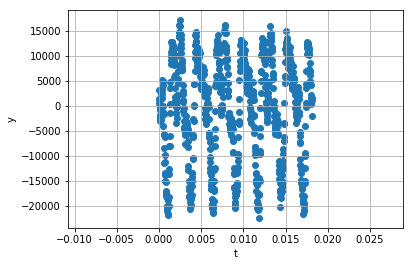

In [6]:
# TODO
plt.scatter(t,y)
plt.xlabel('t')
plt.ylabel('y')
plt.grid()
plt.show()

## Creating Features for a Sinusoidal Model

We will try to fit a model of the form:

$$y[i] = \sum_j a[j]*sin(2*pi*freq[j]*t[i]) + b[j]*cos(2*pi*freq[j]*t[i])$$

That is, $y[i]$ is a sum of sinusoids.  This is a common model for audio signals since an instrument, such as a viola, produces discrete tones.  

This model is non-linear in the frequency parameters.  So, instead of trying to find the frequencies, we will fix a large number of frequencies and then require that the coefficients $a[j]$ and $b[j]$ are mostly sparse.  

We will use the following vector of frequencies.  This vector includes frequencies on the muscial scale as well as frequencies between the musical notes.

In [13]:
freq = 55*2**(np.arange(5*96)/96)

To fit the sinusoidal model, we will write a function to map the values `t` to 
the `sin` and `cos` features.  Finish the function `transform` that creates matrices:

    Xcos[i,j] = np.cos(2*np.pi*t[i]*freq[j])
    Xsin[i,j] = np.sin(2*np.pi*t[i]*freq[j])
    X = np.hstack((Xcos,Xsin))
    
So, if `freq` is length `d`, there will `2*d` features.  You can try to create the matrices using python broadcasting if you want to avoid a for loop.    

In [55]:
def transform(t,freq):
    # TODO
    # Xcos = ...
    # Xsin = ...
    Xcos = np.zeros((t.shape[0], freq.shape[0]))
    Xsin = np.zeros((t.shape[0], freq.shape[0]))
    for i, tval in enumerate(t):
        for j, fval in enumerate(freq):
            Xcos[i,j] = np.cos(2*np.pi*t[i]*freq[j])
            Xsin[i,j] = np.sin(2*np.pi*t[i]*freq[j])
    X = np.hstack((Xcos,Xsin))    
    return X

Split the data `t` and `y` into training and test.  Use approximately 50% for each set.

In [56]:
from sklearn.model_selection import train_test_split

# TODO
# ttr, tts, ytr, yts = train_test_split(...)
ttr, tts, ytr, yts = train_test_split(t,y,test_size=0.5,shuffle=True)

Transform the `ttr`, `tts` into `Xtr` and `Xts`.

In [59]:
# TODO
Xtr = transform(ttr, freq)
Xts = transform(tts, freq)

## Use LASSO to Find the Frequencies

We can now use LASSO regression to find the model
* Use LASSO regression with `alpha=500` to fit the model.  
* Find the R^2-score on the test data.
* Plot the predicted value of `y` for `t in [0,0.02]`.

In [ ]:
from sklearn.linear_model import Lasso

# TODO
# regr = Lasso(...)  
# Regularization values to test
nalpha = 500
alphas = np.logspace(-3,1,nalpha)
# MSE for each alpha and fold value
mse = np.zeros((nalpha,1))
for ia, a in enumerate(alphas):
        
        # Create a LASSO model object
        regr = Lasso(alpha=a)
        
        # Fit the model on the training data
        regr.fit(Xtr,ytr)
        
        # Compute the prediction error on the test data
        yts_pred = regr.predict(Xts)
        mse[ia] = np.mean((yts_pred-yts)**2)

/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:4

/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:4

/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:4

/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:4

/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:4

/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:4

/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:4

/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:4

/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:4

/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/eayn2k/anaconda3/envs/P3.7/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:4

Recall that you can find the coefficient in the model via `w = regr.coef_`.  If `freq` has `d` terms, then `w` will have `2*d` terms.
* Split the coefficients `w` into `a` and `b`, the terms for the `cos` and `sin` features.
* Plot `a` and `b` using `plt.stem`.
* Which frequencies is dominant in this track?


In [9]:
# TODO

Still have time...
* Find the optimal `alpha` using cross-validation